In [1]:
import matplotlib.pyplot as plt
import numpy as np 
from __future__ import division
from scipy.stats import norm



# Toy Problem 

You draw an offer X from a uniform distribution between 0 and 1.
You can either Accept the offer and end the game with the realized net
present value of X, or you can Reject and draw again next period.
All draws are independent.
Rejections are costly because you discount the future at an exponential
discount rate $\beta = 0.9$. 
The game continues until you accept an offer.

What is the minimal value of X you should accept if you follow an optimal
strategy? (Reservation Trophy)

$V(x_i) = max_{\{a,r\}}\{  x_i , \beta EV(x_{i+1})   \}$

$V = \Gamma V = max_{\{a,r\}}\{  x , \beta \sum_{i=1}^{n}V(x).p_i  \}$

### The Price (Trophy) Distribution

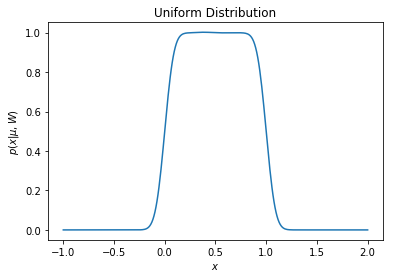

In [2]:
from scipy.stats import gaussian_kde

data = np.random.uniform(low=0.0, high=1.0, size=1000000)

density = gaussian_kde(data)
xs = np.linspace(-1,2,300)
density.covariance_factor = lambda : .25
density._compute_covariance()
plt.plot(xs,density(xs))
plt.xlabel('$x$')
plt.ylabel(r'$p(x|\mu, W)$')
plt.title('Uniform Distribution')
plt.show()

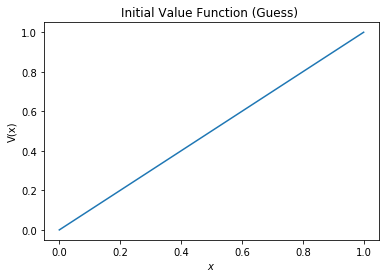

In [3]:
#Let sample size from the value function is 100
n = 100
# Let Beta = 0.96
beta = 0.9
x = np.linspace(0,1,n)
v_initial = np.linspace(0,1,n)

plt.plot(v_initial, x )
plt.xlabel('$x$')
plt.ylabel('V(x)')
plt.title('Initial Value Function (Guess) ')
plt.show()

In [4]:
def get_Vi(v,x,beta,i): # This can be done in vectors easily. I am doing in this way because of pedagogic reasons.
    flow = x[i]
    p_i = 1/100 # Constant because of uniform distribution. Can be estimated emprically, or p values from dist can be used.
    continuation = beta * (np.sum(v*p_i))
    v_i = max(flow, continuation)
    return(v_i)

In [5]:
v = v_initial
for it in range(120): # try 120 iterations
    for i in range(len(v)):
        v[i] = get_Vi(v,x,beta,i)
        
        


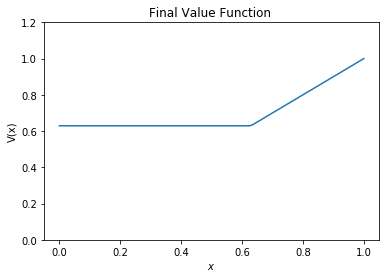

In [6]:
plt.plot(x, v )
plt.xlabel('$x$')
plt.ylabel('V(x)')
plt.title('Final Value Function ')
plt.ylim(0, 1.2)    
plt.show()

## Optimized Coding

$V(x_{i+1}) = \Gamma V(x_i) = max_{\{a,r\}}\{  x_i , \beta \sum_{i=1}^{n}V(x_i).p_i  \}$

In [7]:
def Bellman_Operator(v , x, p ):
    # both of them vectors / Tek DATAFRAME ILE DENE
    # v is the vector of value function
    # x is the vector of the state variable
    # p is the pdf values of the state variable (state variable is coming from this distribution)
    beta = 0.9
    n = len(v)
    flow = x
    continuation = beta * np.dot(v,p)
    v_next = flow*(flow>continuation) + continuation*(continuation > flow)
    return(v_next)

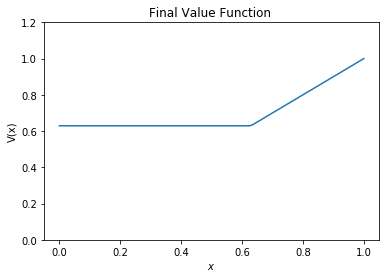

In [8]:
n = 100
v_initial = np.linspace(0,1,n)
x = np.linspace(0,1,n)
p = 0*x + 1/n # discrete uniform pdf
max_iter = 100

v = v_initial
for iteration in range(max_iter):
    v = Bellman_Operator(v,x,p)
    
plt.plot(x, v )
plt.xlabel('$x$')
plt.ylabel('V(x)')
plt.title('Final Value Function ')
plt.ylim(0, 1.2)    
plt.show()

1.76327337547
0.639695768945
0.306960870412


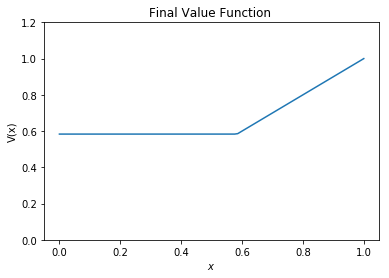

In [9]:
n = 100
v_initial = np.linspace(0,1,n)
x = np.linspace(0,1,n)
p = 0*x + 1/n # discrete uniform pdf
eps = 9

v_new = v_initial
while eps > 0.5:
    v_old  = v_new
    v_new = Bellman_Operator(v_old,x,p)
    eps = np.linalg.norm(v_new-v_old)
    print eps

    
plt.plot(x, v_new )
plt.xlabel('$x$')
plt.ylabel('V(x)')
plt.title('Final Value Function ')
plt.ylim(0, 1.2)    
plt.show()

# McCall Job Search Model

An unemployed worker receives in each period a job offer at wage $w_t$
At time t our worker has two choices:

1- Accept the offer and work permanently at constant wage $w_t$

2- Reject the offer, receive unemployment compensation $c$ and reconsider next period

Thus, the objective of the worker is to maximize lifetime earnings

$$max \text{    } E \sum_{t=0}^{\infty} \beta^t Y_t$$

where $Y_t$ is $w_t$ when employed, is $c$ when unemployed. 

Bellman equation is as follows:

$$V(w_t) = max_{a,r}\{ \frac{w_t}{1-\beta}, c+ \beta E[V(w_{t+1})] \text{ }\}$$

$$ V_{i+1}(w_t)=\Gamma V_i(w_t) = max_{a,r}\{ \frac{w_t}{1-\beta}, c+ \beta E[V_i(w_{t})] \text{ }\}$$

In [10]:
def Bellman_Operator(v , w, p ):
    # both of them vectors / Tek DATAFRAME ILE DENE
    # v is the vector of value function
    # x is the vector of the state variable
    # p is the pdf values of the state variable (state variable is coming from this distribution)
    beta = 0.9
    c = 5
    flow = w/(1-beta)
    continuation = c + (beta * np.dot(v,p))
    v_next = flow*(flow>continuation) + continuation*(continuation > flow)
    return(v_next)

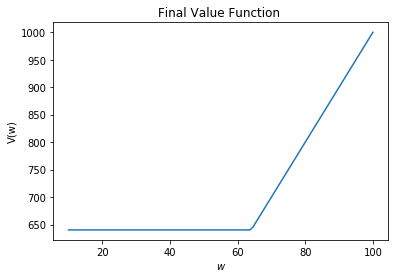

In [11]:
n = 100

v_initial = np.linspace(0,1,n)

w_min, w_max = 10, 100
w = np.linspace(w_min, w_max, n)

p = norm.pdf(w, loc = 45, scale = 15)

max_iter = 100

v = v_initial
for iteration in range(max_iter):
    v = Bellman_Operator(v,w,p)
    
plt.plot(w, v )
plt.xlabel('$w$')
plt.ylabel('V(w)')
plt.title('Final Value Function ')
plt.show()

# Growth Model

Consider the deterministic version of the neoclassical growth model:

$$ sup_{c_t, k_{t+1}} \sum_{t=0}^{\infty} \beta^t ln(c_t)$$

$$ c_t + k_{t+1} = \theta k_t^{\alpha}$$

$$ c_t \geq 0, \text{  } k_{t+1}\geq 0 \text{  } k_0 given  $$

$$0 \leq \alpha < 1$$
$$0 < \beta < 1$$



Corresponding Bellman equation is 

$$ V(k_0) = sup_{k_1 \in \gamma(k_0)}\{   ln( \theta k_0^{\alpha} - k_{1} ) + \beta(V(k_1))   \}$$

And the Bellman operator is 

$$V_{i+1}(k) = \Gamma V_{i}(k) = sup_{k\prime \in \gamma(k)}\{   ln( \theta k^{\alpha} - k\prime ) + \beta V_i(k)   \}$$

In [12]:
def V_kprime(v,k,k_prime_vec):
    res = k_prime_vec.copy()*(-99)
    V_dict = dict(zip(k, v))

    for i in range(len(k_prime_vec)):
        res[i] = V_dict[min(k, key=lambda x:abs(x-k_prime_vec[i]))]
    return(res)

In [13]:
v_func = lambda x: np.interp(x, k, v)



In [14]:
def pointwise_BO(v,kk,k):
    
    v_func = lambda x: np.interp(x, k, v) # very crucial 

    alpha = 0.4 # capital share
    beta = 0.96  # discount rate
    theta = 1   # technology
    
    kprimelar = np.linspace(0, theta*kk**alpha - 0.001,1000) #bunlar k' lar 
    res_v = max(np.log( (theta * (kk**alpha)) - kprimelar) + beta * v_func(kprimelar))

    return(res_v)

In [15]:
def Bellman_Operator(v , k ):
    # both of them vectors / Tek DATAFRAME ILE DENE
    # v is the vector of value function
    # k is the vector of the state variable
    alpha = 0.4 # capital share
    beta = 0.96  # discount rate
    theta = 1   # technology
    for i in range(len(k)):
        kk = k[i]
        v[i] = pointwise_BO(v,kk,k)

    return(v)

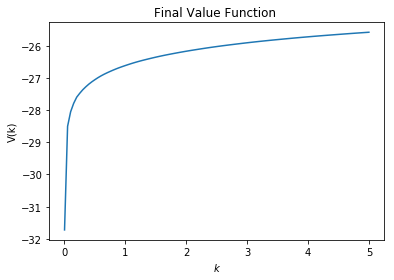

In [16]:
N = 100

k_min, k_max = 0.001, 5
k = np.linspace(k_min, k_max, N+1)
max_iter = 100

v = k.copy()

for iteration in range(max_iter):
    v = Bellman_Operator(v,k)
    
plt.plot(k, v )
plt.xlabel('$k$')
plt.ylabel('V(k)')
plt.title('Final Value Function ')
plt.show()

In [17]:
theta = 1
alpha = 0.4
beta = 0.96 

A = alpha/(1-alpha*beta)
print theta
print alpha
print beta
B = (1/(1-beta) ) * ( np.log(1-alpha*beta) + (alpha*beta)/(1-alpha*beta)*np.log(alpha*beta) + (1/(1-alpha*beta)*np.log(theta)))
print A
print B

1
0.4
0.96
0.649350649351
-27.0287503755


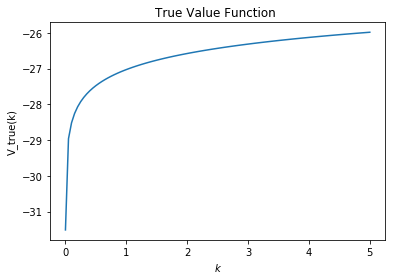

In [18]:
trueValFunc = A*np.log(k)+B
plt.plot(k, trueValFunc )
plt.xlabel('$k$')
plt.ylabel('V_true(k)')
plt.title('True Value Function ')
plt.show()